# Data Preprocessing

Data preprocessing is the process of transforming the raw data obtained from various sources into a usable format to training a machine learning model. The dataset initially provided for training might not be in a ready-to-use state, for e.g. it might not be formatted properly, or may contain missing or null values. Solving all these problems using various methods is called Data Preprocessing.

Steps in Data Preprocessing
1. Importing the libraries
2. Importing the Dataset
3. Handling of Missing Data
4. Handling of Categorical Data
5. Splitting the dataset into training and testing datasets
6. Feature Scaling

## 1. Importing the Libraries

In [81]:
#Importing Libraries
import numpy as np # used for handling arrays
import matplotlib.pyplot as plt  # used for data visualization
import pandas as pd # used for handling the dataset

## 2. Importing the Dataset 

In [82]:
pwd

'C:\\Users\\student\\Desktop\\20-737-105'

In [83]:
ls

 Volume in drive C is Windows 
 Volume Serial Number is 8092-7174

 Directory of C:\Users\student\Desktop\20-737-105

18-03-2023  11:29    <DIR>          .
18-03-2023  10:14    <DIR>          ..
18-03-2023  11:03    <DIR>          .ipynb_checkpoints
18-03-2023  11:00            72,315 1 Python Libraries for ML.ipynb
18-03-2023  10:15            10,076 2 Data Preprocessing_Boston House.ipynb
18-03-2023  11:29            58,624 2 Data Preprocessing_PurchaseDS.ipynb
18-03-2023  10:04            35,206 Boston.csv
18-03-2023  10:04               228 Data.csv
               5 File(s)        176,449 bytes
               3 Dir(s)  415,187,296,256 bytes free


In [84]:
# importing the dataset into a variable
dataset=pd.read_csv('Data.csv')

In [85]:
dataset

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [86]:
dataset.head(3)

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No


In [87]:
dataset.tail()

,Country,Age,Salary,Purchased
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Salary'}>]], dtype=object)

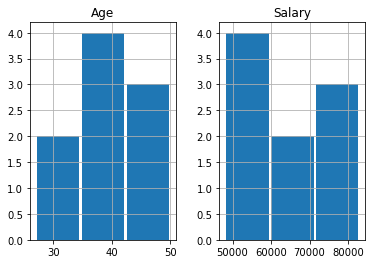

In [88]:
dataset.hist(rwidth=0.95,bins=3)

(array([2., 4., 3.]),
 array([27, 35, 42, 50]),
 <BarContainer object of 3 artists>)

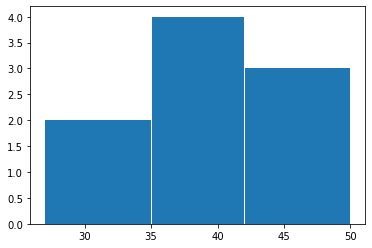

In [89]:
plt.hist(dataset.iloc[:,1],rwidth=0.99,bins=[27,35,42,50])

(array([4., 2., 3.]),
 array([48000.        , 59666.66666667, 71333.33333333, 83000.        ]),
 <BarContainer object of 3 artists>)

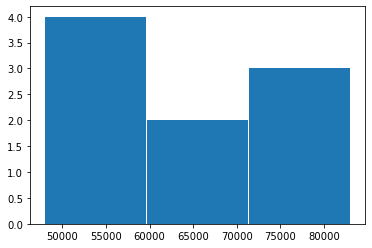

In [90]:
plt.hist(dataset.iloc[:,2],rwidth=0.99,bins=3)

We specified two variables, x for the independent features and y for the dependent variable. The features set, as declared in the code dataset.iloc[:,:-1] consists of all rows and columns of our dataset except the last column. Similarly, the dependent variable y consists of all rows but only the last column as declared in the code dataset.iloc[:,3].values.

In [91]:
# Splitting the attributes into independent and dependent attributes
# attributes to determine dependent variable / Class
x=dataset.iloc[:,:-1].values

# dependent variable / Class
y=dataset.iloc[:,3].values

In [92]:
x

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [93]:
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

## 3. Handling of Missing Data

Most machine learning models require data with a value for all features in each observation. In such models, missing data may lead to bias in the estimation of the parameters and also compromise the accuracy of the machine learning models.

First of all, we need to check whether we have null values in our dataset or not. We can do that using the isnull() method.

pd.isnull() # Returns a boolean matrix, if the value is NaN then True otherwise False.

In [94]:
#pd.isnull(dataset)
dataset.isnull()

,Country,Age,Salary,Purchased
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,True,False
5,False,False,False,False
6,False,True,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [95]:
#pd.notnull(dataset)
dataset.notnull()

,Country,Age,Salary,Purchased
0,True,True,True,True
1,True,True,True,True
2,True,True,True,True
3,True,True,True,True
4,True,True,False,True
5,True,True,True,True
6,True,False,True,True
7,True,True,True,True
8,True,True,True,True
9,True,True,True,True


In [96]:
pd.isnull(dataset).any()
#dataset.isnull().any()
# Returns True if the column contains NaN, otherwise False

Country      False
Age           True
Salary        True
Purchased    False
dtype: bool

In [97]:
pd.isnull(dataset).sum()
#dataset.isnull().sum()
# Returns the column names along with the number of NaN values in that particular column

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

The easiest way to handle null values is by dropping the rows or columns that contain null values.

In [98]:
# dataset.dropna(axis=0)
# help(dataset.dropna)

This technique works well on big datasets with few missing values. For instance, deleting a row from a dataset with hundreds of observations cannot affect the information quality of the dataset. However, this technique is not suitable for a dataset reporting many missing values. Deleting many rows from a dataset leads to the loss of information.

The most common idea to handle the missing data is to take the mean of the columns.

In [99]:
#SimpleImputer is used for handling missing data
from sklearn.impute import SimpleImputer 

In [100]:
missing=SimpleImputer(missing_values=np.nan, strategy='mean')

In [101]:
missing.fit(x[:,1:3])
#Fit the model to the columns that contain missing values.

SimpleImputer()

In [102]:
x[:,1:3]=missing.transform(x[:,1:3])
#Used to replace the missing data by the mean value

In [103]:
print(x)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


And now, we can see that we have filled all the missing values by mean of all values.

## 4. Handling of Categorical Data

We can take care of categorical features by converting them to integers. 

There are 2 common ways to do so.
1. Label Encoding
2. One Hot Encoding

In Label Encoder, we can convert the Categorical values into numerical labels.

In [104]:
#LableEncoder is used for encoding categorical data
from sklearn.preprocessing import LabelEncoder 
labelencoder_x=LabelEncoder()
x[:,0]=labelencoder_x.fit_transform(x[:,0])

Here we have instantiated a LabelEncoder object, then used the fit method to fit it on our categorical column and then used transform method to apply it.

In [105]:
print(x)

[[0 44.0 72000.0]
 [2 27.0 48000.0]
 [1 30.0 54000.0]
 [2 38.0 61000.0]
 [1 40.0 63777.77777777778]
 [0 35.0 58000.0]
 [2 38.77777777777778 52000.0]
 [0 48.0 79000.0]
 [1 50.0 83000.0]
 [0 37.0 67000.0]]


This technique has a drawback that it gives the Spain the highest priority due to its label is high and France the lowest priority for its label being 0.

In the country column, we have three different categories: France, Germany, Spain. We can simply label France as 0, Germany as 1, and Spain as 2 but doing this might lead our machine learning model to interpret that there is some correlation between these numbers and the outcome.
So to avoid this, we apply OneHot Encoding.

OneHot Encoding consists of turning the country column into three separate columns, each column consists of 0s and 1s. Therefore each country will have a unique vector/code and no correlation between the vectors and outcome can be formed.

In [106]:
#OneHotEncoder is used to handle Nominal categorical variables
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
  
ct = ColumnTransformer(
    [('encoder', OneHotEncoder(), [0])],    # The column numbers to be transformed (here is [0] but can be [0, 1, 3])
    remainder='passthrough'                 # Leave the rest of the columns untouched
)

x = np.array(ct.fit_transform(x), dtype=np.int64)

In [107]:
x

array([[    1,     0,     0,    44, 72000],
       [    0,     0,     1,    27, 48000],
       [    0,     1,     0,    30, 54000],
       [    0,     0,     1,    38, 61000],
       [    0,     1,     0,    40, 63777],
       [    1,     0,     0,    35, 58000],
       [    0,     0,     1,    38, 52000],
       [    1,     0,     0,    48, 79000],
       [    0,     1,     0,    50, 83000],
       [    1,     0,     0,    37, 67000]], dtype=int64)

In [108]:
df = pd.DataFrame(x, dtype=int)
df
#print(x)

,0,1,2,3,4
0,1,0,0,44,72000
1,0,0,1,27,48000
2,0,1,0,30,54000
3,0,0,1,38,61000
4,0,1,0,40,63777
5,1,0,0,35,58000
6,0,0,1,38,52000
7,1,0,0,48,79000
8,0,1,0,50,83000
9,1,0,0,37,67000


In the last column, i.e. the purchased column, the data is in binary form meaning that there are only two outcomes either Yes or No. Therefore here we need to perform Label Encoding.
In this case, we use LabelEncoder class from the same ScikitLearn library.

In [109]:
#Now let's take care of the second variable which is 'Purchased'
#We don't have to use OneHotEncoder, because it is a dependent variable. We are going to use LabelEncoder
labelencoder_y=LabelEncoder()
y=labelencoder_y.fit_transform(y)
print(y)

[0 1 0 0 1 1 0 1 0 1]


## 5. Splitting the dataset into training and testing datasets

Train Test Split is one of the important steps in Machine Learning. It is very important because your model needs to be evaluated before it has been deployed. And that evaluation needs to be done on unseen data because when it is deployed, all incoming data is unseen.

In order to do that, we divide our data set into two parts: training set and testing set. 

As the name itself suggests, we use the training set to make the algorithm learn the behaviors present in the data and check the correctness of the algorithm by testing on testing set.

In [110]:
# splitting the dataset into training set and test set
#The easiest way to do it is by using scikit-learn, which has a built-in function train_test_split.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

Here we have passed-in X and y as arguments in train_test_split, which splits X and y such that there is 20% testing data and 80% training data successfully split between X_train, X_test, y_train, and y_test.

In [111]:
print(len(x_train))
print(x_train.shape)
print(x_test.shape)

8
(8, 5)
(2, 5)


In [117]:
print(x_train)

[[    0     1     0    40 63777]
 [    1     0     0    37 67000]
 [    0     0     1    27 48000]
 [    0     0     1    38 52000]
 [    1     0     0    48 79000]
 [    0     0     1    38 61000]
 [    1     0     0    44 72000]
 [    1     0     0    35 58000]]


In [118]:
print(y_train)

[1 1 1 0 1 0 0 1]


In [119]:
print(x_test)

[[    0     1     0    30 54000]
 [    0     1     0    50 83000]]


In [120]:
print(y_test)

[0 0]


## 6. Feature Scaling

In [121]:
#StandardScaler is used for feature scaling
from sklearn.preprocessing import StandardScaler 
sc_x=StandardScaler()
x_train_ss=sc_x.fit_transform(x_train)
x_test_ss=sc_x.transform(x_test)

In [122]:
print(x_train_ss.shape)

(8, 5)


In [123]:
print(x_train_ss)

[[-1.          2.64575131 -0.77459667  0.27978024  0.12374357]
 [ 1.         -0.37796447 -0.77459667 -0.23673712  0.4617671 ]
 [-1.         -0.37796447  1.29099445 -1.95846165 -1.53092514]
 [-1.         -0.37796447  1.29099445 -0.06456467 -1.11141099]
 [ 1.         -0.37796447 -0.77459667  1.65715986  1.72030956]
 [-1.         -0.37796447  1.29099445 -0.06456467 -0.16750414]
 [ 1.         -0.37796447 -0.77459667  0.96847005  0.98615979]
 [ 1.         -0.37796447 -0.77459667 -0.58108203 -0.48213975]]


In [124]:
print(x_test_ss)

[[-1.          2.64575131 -0.77459667 -1.44194429 -0.90165391]
 [-1.          2.64575131 -0.77459667  2.00150476  2.13982372]]


In [125]:
from sklearn.preprocessing import Normalizer
scaler=Normalizer()
x_train_normalizer=scaler.fit_transform(x_train)
x_test_normalizer=scaler.transform(x_test)

In [126]:
print(x_train_normalizer)

[[0.00000000e+00 1.56796306e-05 0.00000000e+00 6.27185226e-04
  9.99999803e-01]
 [1.49253709e-05 0.00000000e+00 0.00000000e+00 5.52238722e-04
  9.99999847e-01]
 [0.00000000e+00 0.00000000e+00 2.08333300e-05 5.62499911e-04
  9.99999842e-01]
 [0.00000000e+00 0.00000000e+00 1.92307641e-05 7.30769036e-04
  9.99999733e-01]
 [1.26582255e-05 0.00000000e+00 0.00000000e+00 6.07594825e-04
  9.99999815e-01]
 [0.00000000e+00 0.00000000e+00 1.63934394e-05 6.22950699e-04
  9.99999806e-01]
 [1.38888863e-05 0.00000000e+00 0.00000000e+00 6.11110997e-04
  9.99999813e-01]
 [1.72413762e-05 0.00000000e+00 0.00000000e+00 6.03448166e-04
  9.99999818e-01]]


In [127]:
#Binarize data (set feature values to 0 or 1) according to a threshold
#We can transform our data using a binary threshold. 
#All values above the threshold are marked 1 and all equal to or below are marked as 0.
#from sklearn.preprocessing import Binarizer
#binarizer=Binarizer()
#x_train_binarizer=binarizer.fit_transform(x_train)
#x_test_binarizer=binarizer.transform(x_test)

In [128]:
#x_train_binarizer

In [129]:
#The min-max scalar form of normalization uses the mean and standard deviation to box all the data into a range lying between a certain min and max value. 
#For most purposes, the range is set between 0 and 1
#from sklearn.preprocessing import MinMaxScaler
#scaler=MinMaxScaler(feature_range=(-1,1))
#x_train_mm=scaler.fit_transform(x_train)
#x_test_mm=scaler.transform(x_test)

In [130]:
#x_train_mm